__Author:__ Bram Van de Sande

__Date:__ 22 MAR 2018

__Outline:__ Examples of how to run aucell in different circumstances.

## Example 1: A single gene signature in a custom format

In [1]:
import pandas as pd
from pyscenic.genesig import GeneSignature
from pyscenic.aucell import create_rankings, enrichment

In [2]:
GENE_SIGNATURE_FNAME = 'oxphos_mitocomp2_genes.tsv'
EXPRESSION_MTX_FNAME = '' # Gene expression as (cell, gene) - matrix.

In [ ]:
with open(GENE_SIGNATURE_FNAME, 'r') as f:
    # Skip first line because it contains the name of the signature
    gs = GeneSignature('Gene Signature #1', 
                       'FlyBase', 
                       [line.strip() for idx, line in enumerate(f) if idx > 0])

In [ ]:
ex_matrix = pd.read_csv(EXPRESSION_MTX_FNAME, sep='\t', header=0, index_col=0)
rnk_mtx = create_rankings(ex_matrix)
aucs = enrichment(rnk_mtx, gs, rank_threshold=1200)

aucs

## Example 2: Gene signatures from a GMT file

In [1]:
import pandas as pd
import seaborn as sns
from pyscenic.genesig import GeneSignature
from pyscenic.aucell import aucell, derive_auc_threshold, create_rankings

In [2]:
%load_ext memory_profiler

In [3]:
# A module from GeneSigDB (C6)
GMT_FNAME = 'signatures.hgnc.gmt'
# An expression matrix from GEO
EXPRESSION_MTX_FNAME = 'GSE103322.mtx.tsv' # Gene expression as (cell, gene) - matrix.

In [4]:
signatures = GeneSignature.from_gmt(GMT_FNAME, 'HGNC', field_separator='\t', gene_separator='\t')
len(signatures)

189

In [5]:
ex_matrix = pd.read_csv(EXPRESSION_MTX_FNAME, sep='\t', header=0, index_col=0).T
ex_matrix.shape

(5902, 20684)

It is important to check that most cells have a substantial fraction of expressed/detected genes in the calculation of the AUC. We therefore calculate the cell percentiles for a given fraction of the genome dectected in the sc transcriptomics experiment. 

In [8]:
percentiles = derive_auc_threshold(ex_matrix)
percentiles

0.01    0.092294
0.05    0.102497
0.10    0.112067
0.50    0.170712
1.00    0.632421
dtype: float64

Calculate the AUCs.

In [9]:
aucs_mtx = aucell(ex_matrix, signatures, auc_threshold=percentiles[0.01], num_cores=8)
aucs_mtx.head()

Regulome,GLI1_UP.V1_DN,GLI1_UP.V1_UP,E2F1_UP.V1_DN,E2F1_UP.V1_UP,EGFR_UP.V1_DN,EGFR_UP.V1_UP,ERB2_UP.V1_DN,ERB2_UP.V1_UP,GCNP_SHH_UP_EARLY.V1_DN,GCNP_SHH_UP_EARLY.V1_UP,...,KRAS.KIDNEY_UP.V1_DN,KRAS.KIDNEY_UP.V1_UP,KRAS.LUNG_UP.V1_DN,KRAS.LUNG_UP.V1_UP,KRAS.LUNG.BREAST_UP.V1_DN,KRAS.LUNG.BREAST_UP.V1_UP,KRAS.PROSTATE_UP.V1_DN,KRAS.PROSTATE_UP.V1_UP,LEF1_UP.V1_DN,LEF1_UP.V1_UP
Cell,,,,,,,,,,,,,,,,,,,,,
HN23_P11_A04_S4_comb,0.128564,0.111771,0.051896,0.050566,0.039393,0.065499,0.036249,0.035901,0.062295,0.030900,...,0.015078,0.017755,0.001894,0.044190,0.018153,0.060841,0.010864,0.020389,0.030556,0.062802
HN23_P11_A07_S7_comb,0.067163,0.107056,0.075413,0.038611,0.057209,0.040269,0.059312,0.043201,0.061105,0.065476,...,0.022427,0.005235,0.008040,0.039448,0.012308,0.038118,0.027182,0.034916,0.028091,0.043804
HN23_P11_A08_S8_comb,0.122596,0.153309,0.061592,0.051053,0.067482,0.082910,0.050197,0.065860,0.073363,0.072591,...,0.033048,0.012286,0.003295,0.039682,0.021036,0.043562,0.021872,0.024149,0.052156,0.077759
HN23_P11_A09_S9_comb,0.126431,0.113226,0.060589,0.051123,0.048220,0.046427,0.053089,0.028365,0.054061,0.066610,...,0.017951,0.030063,0.010518,0.034006,0.013235,0.035256,0.018983,0.024669,0.043453,0.071669
HN23_P11_A12_S12_comb,0.070961,0.054731,0.064008,0.079014,0.074363,0.058168,0.065609,0.024973,0.058245,0.089009,...,0.032325,0.016558,0.007747,0.031020,0.027695,0.028595,0.017579,0.029105,0.036791,0.026784


Make a nice clustered heatmap.

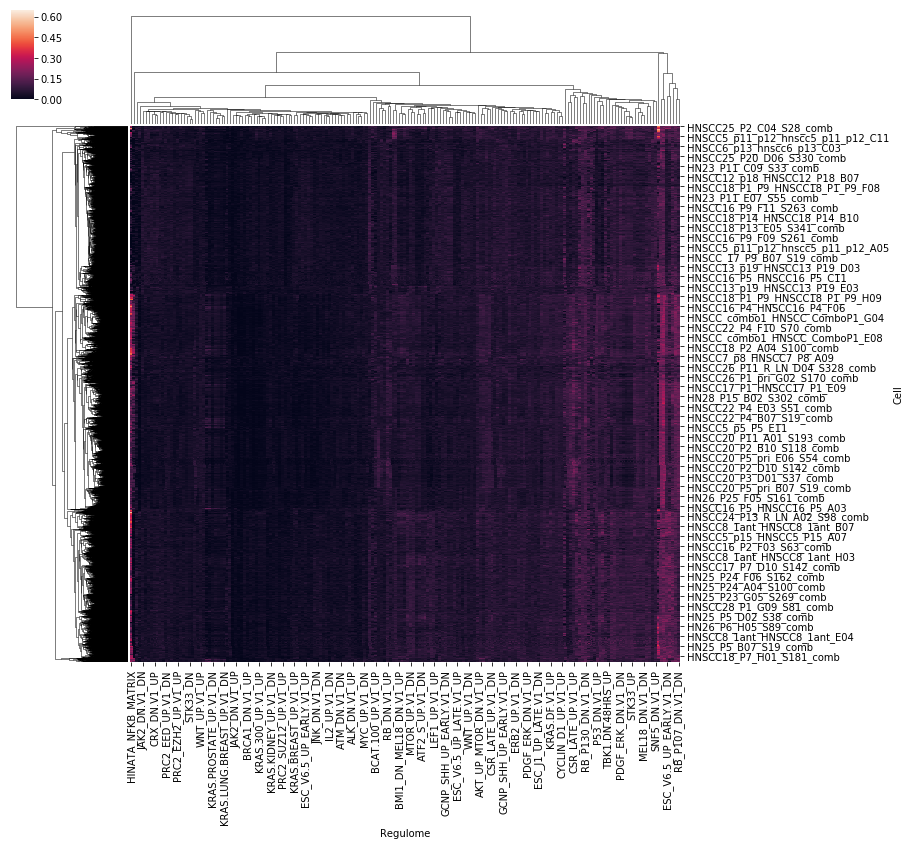

In [10]:
sns.clustermap(aucs_mtx, figsize=(12,12))